## Object detection 

In [1]:
# import libraries
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [3]:
# download image
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

100%|██████████| 160/160 [00:00<00:00, 2281.77KB/s]


'dog.jpg'

In [4]:
# load image
image = mx.image.imread(image_filepath)
print('shape:', image.shape)
print('data type:', image.dtype)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

('shape:', (576, 768, 3))
('data type:', <type 'numpy.uint8'>)
('minimum value:', 0)
('maximum value:', 255)


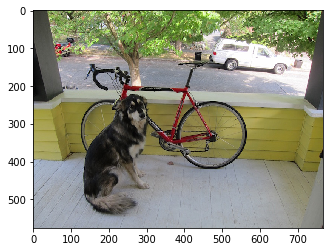

In [6]:
# Visual image
plt.imshow(image.asnumpy());

In [8]:
# YOLO transform and batch image (chw = channel, height, width)
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)
print('shape:', image.shape)
print('data type:', image.dtype)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

('shape:', (1, 3, 512, 683))
('data type:', <type 'numpy.float32'>)
('minimum value:', -2.117904)
('maximum value:', 2.64)


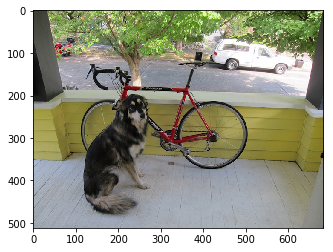

In [11]:
# Visual image of resided version of the original image used for plotting results
plt.imshow(chw_image);

When we generate some predictions from the network, we'll overlay the detected objects onto this image. 

In [12]:
# load model
network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)

Model file is not found. Downloading.


100%|██████████| 224190/224190 [00:21<00:00, 10265.65KB/s]


We will use the yolo3 network with a darknet53 backbone that has been trained on the coco dataset.

In [13]:
# make prediciton
prediction = network(image)

In [14]:
type(prediction)

tuple

prediction returns a type corresponding to the object class index, probabilities, and bounding box coordinates.

In [17]:
for index, array in enumerate(prediction):
    print('#{} shape: {}'.format(index + 1, array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


#1 shape: (1, 100, 1) array contains the object class indexes
#2 shape: (1, 100, 1) array contains the object class probabilities
#3 shape: (1, 100, 4)  array contains the object bounding box coordinates

We give the network a batch of one image, so we get back a batch of one prediction, meaning of the first 1 in the tuple. And the model can predict up to 100 objects in a single image.

And for the last array, with shape 1, 100, 4, we have 1 image, 100 potential objects. And 4 values for each object to define its bounding box.

In [20]:
# remove the additional batch dimension for all the arrays
prediction = [array[0] for array in prediction]

In [22]:
# unpack the prediciton tuple (each array is given its own variable)
class_indicies, probabilities, bounding_boxes = prediction

In [23]:
# Object class indexes
k = 10
print(class_indicies[:k]) # the top-one class is chosen.


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


We have six detected objects in total, with the remaining 94 potential objects being padded with -1 values.

Note: -1 is a special class index that is used to indicate there is no detected object.

In [24]:
# class labels
network.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [27]:
# our top object was class 16 which corresponds to dog being detected in the image
class_index = 16
assert class_index > -1
print(network.classes[class_index])

dog


In [31]:
# object probabilities (can interpret this as our confidence)
print(probabilities[:k])


[[ 0.9919528 ]
 [ 0.9600399 ]
 [ 0.62269694]
 [ 0.29241994]
 [ 0.01795173]
 [ 0.01141722]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


Using a confidence threshold of 50%, we can see that six objects have been detected. 

In [32]:
# bounding box-coordinates
print(bounding_boxes[:k])


[[116.53646  201.33237  281.90323  482.0909  ]
 [ 93.92975  107.73944  504.75128  375.75415 ]
 [416.78833   69.800644 615.01794  148.89009 ]
 [416.78833   69.800644 615.01794  148.89009 ]
 [ 90.88356  125.8788   504.4449   402.79553 ]
 [532.78235   91.84185  547.3104   104.69111 ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


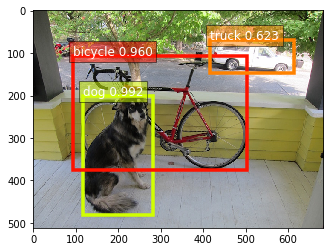

In [34]:
# visualize prediction
gcv.utils.viz.plot_bbox(chw_image, # resized image
                        bounding_boxes, # bounding box
                        probabilities,  # class probabilities
                        class_indicies, # class label prediction
                        class_names=network.classes # to add anotation to the plot
                       );